### K Means Clustering

In [92]:
import random
height=[]
weight=[]
for i in range(12):
    height.append(random.randint(100,120))
    weight.append(random.randint(50,98))
print(height)
print(weight)


[105, 114, 120, 105, 104, 111, 111, 108, 113, 119, 118, 108]
[55, 87, 50, 67, 68, 71, 90, 67, 59, 72, 55, 62]


In [93]:
import numpy as np

def find_distance(cur_h,cur_w,center):
    k1_h=(cur_h-center[0])
    k1_w=(cur_w-center[1])
    if(k1_h<0):
        k1_h=(k1_h*-1)
    k1_h=k1_h*k1_h

    if(k1_w<0):
        k1_w=(k1_w*-1)
    k1_w=k1_w*k1_w

    k1_sum=k1_h+k1_w
    k1_dist=np.sqrt(k1_sum)
    return k1_dist

In [94]:
def find_centroid(set1):
    sum1=0
    sum2=0
    for elem in set1:
        sum1=sum1+elem[0]
        sum2=sum2+elem[1]
    kc1=sum1/len(set1)
    kc2=sum2/len(set1)
    return (kc1,kc2)
        

In [95]:
def Kmeans_cluster(height,weight,k1_c,k2_c,k1_set,k2_set):
    for i in range(2,len(height)):
        min1=0
        k1_dist=find_distance(height[i],weight[i],k1_c)
        k2_dist=find_distance(height[i],weight[i],k2_c)
        if(k1_dist<k2_dist):
            min1=k1_dist            
        else:
            min1=k2_dist
        if(min1==k1_dist):
            k1_set.append((height[i],weight[i]))
            k1_c=find_centroid(k1_set)
        else:
            k2_set.append((height[i],weight[i]))
            k2_c=find_centroid(k2_set)
    print("The first cluster set contains",k1_set)
    print("The second cluster set contains",k2_set)
    return (k1_c,k2_c)
        
        
        
    

In [96]:
k1_c=(height[0],weight[0])
k2_c=(height[1],weight[1])
k1_set=[k1_c]
k2_set=[k2_c]
k1_c,k2_c=Kmeans_cluster(height,weight,k1_c,k2_c,k1_set,k2_set)
print("Centroid of First set",k1_c)
print("Centroid of Second set",k2_c)

The first cluster set contains [(105, 55), (120, 50), (105, 67), (104, 68), (111, 71), (108, 67), (113, 59), (119, 72), (118, 55), (108, 62)]
The second cluster set contains [(114, 87), (111, 90)]
Centroid of First set (111.1, 62.6)
Centroid of Second set (112.5, 88.5)


[]

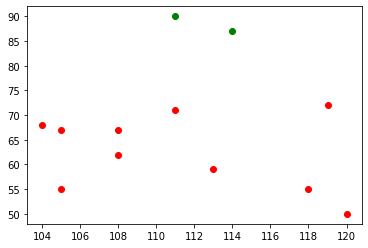

In [97]:
import pandas as pd
df1=pd.DataFrame(k1_set,columns=['height','weight'])
df2=pd.DataFrame(k2_set,columns=['height','weight'])
plt.scatter(df1['height'],df1['weight'],color='red')
plt.scatter(df2['height'],df2['weight'],color='green')
plt.plot()

## Second Example by taking constant values

In [74]:
height=[185,170,168,179,182,188,180,180,183,180,180,177]
weight=[72,56,60,68,72,77,71,70,84,88,67,76]
k1_c=(height[0],weight[0])
k2_c=(height[1],weight[1])
k1_set=[k1_c]
k2_set=[k2_c]
k1_c,k2_c=Kmeans_cluster(height,weight,k1_c,k2_c,k1_set,k2_set)
print("Centroid of First set",k1_c)
print("Centroid of Second set",k2_c)

The first cluster set contains [(185, 72), (179, 68), (182, 72), (188, 77), (180, 71), (180, 70), (183, 84), (180, 88), (180, 67), (177, 76)]
The second cluster set contains [(170, 56), (168, 60)]
Centroid of First set (181.4, 74.5)
Centroid of Second set (169.0, 58.0)


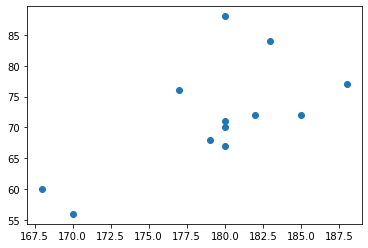

In [75]:
import matplotlib.pyplot as plt
import pandas as pd
df_ht=pd.Series(height)
df_wt=pd.Series(weight)
plt.scatter(df_ht,df_wt)

[]

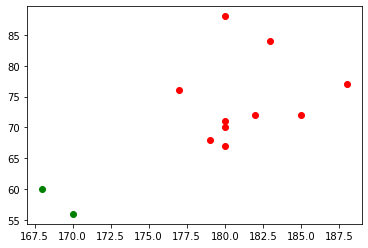

In [76]:
import pandas as pd
df1=pd.DataFrame(k1_set,columns=['height','weight'])
df2=pd.DataFrame(k2_set,columns=['height','weight'])
plt.scatter(df1['height'],df1['weight'],color='red')
plt.scatter(df2['height'],df2['weight'],color='green')
plt.plot()

In [77]:
def predict(predict_point,k1_c,k2_c,k1_set,k2_set):
    k1_dist=find_distance(predict_point[0],predict_point[1],k1_c)
    k2_dist=find_distance(predict_point[0],predict_point[1],k2_c)
    if(k1_dist<k2_dist):
        min1=k1_dist            
    else:
        min1=k2_dist
    if(min1==k1_dist):
        k1_set.append(predict_point)
        k1_c=find_centroid(k1_set)
    else:
        k2_set.append(predict_point)
        k2_c=find_centroid(k2_set)
    print(k1_set)
    print(k2_set)
    return (k1_c,k2_c)

In [78]:
predict_point=(172,58)
k1_c,k2_c=predict(predict_point,k1_c,k2_c,k1_set,k2_set)
print("Centroid of First set",k1_c)
print("Centroid of Second set",k2_c)

[(185, 72), (179, 68), (182, 72), (188, 77), (180, 71), (180, 70), (183, 84), (180, 88), (180, 67), (177, 76)]
[(170, 56), (168, 60), (172, 58)]
Centroid of First set (181.4, 74.5)
Centroid of Second set (170.0, 58.0)


After prediction of new point


[]

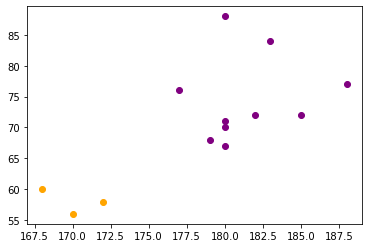

In [79]:
print("After prediction of new point")
df1=pd.DataFrame(k1_set,columns=['height','weight'])
df2=pd.DataFrame(k2_set,columns=['height','weight'])
plt.scatter(df1['height'],df1['weight'],color='purple')
plt.scatter(df2['height'],df2['weight'],color='orange')
plt.plot()